 Predicion Using Supervised ML
 Author : Gnanashri K V

-> Here we will predict the percentage of a student based on the number of  hours the student dedicates to studies.

# Import the required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
print("required lib are imported")

required lib are imported


# Reading the data

In [4]:
url = "https://bit.ly/w-data"
data = pd.read_csv(url)
print("data has been imported")

data has been imported


# Exploring the imported data

In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Data Visualization

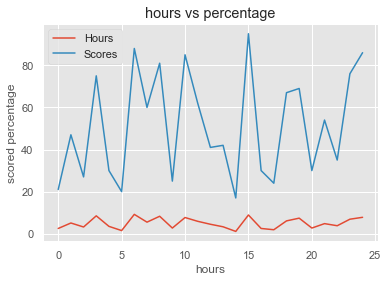

In [10]:

plt.style.use('ggplot')
data.plot(kind='line')
plt.title('hours vs percentage')
plt.xlabel('hours')
plt.ylabel('scored percentage')
plt.show()


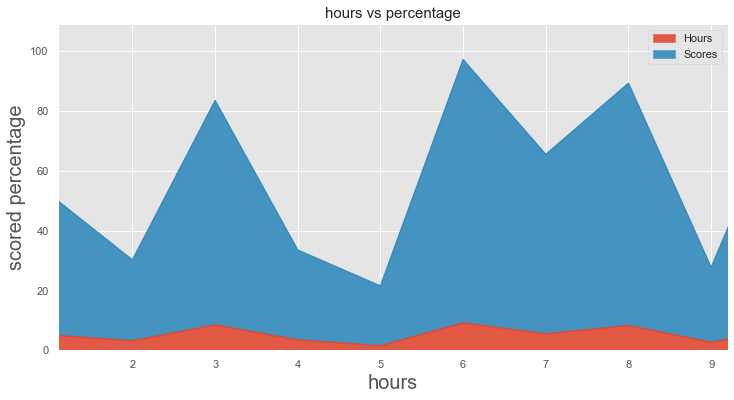

In [12]:
xmin=min(data.Hours)
xmax=max(data.Hours)
data.plot(kind='area',figsize=(12,6),stacked=True,alpha=0.9,xlim=(xmin,xmax))
plt.title('hours vs percentage',size=15)
plt.xlabel('hours',size=20)
plt.ylabel('scored percentage',size=20)
plt.show()

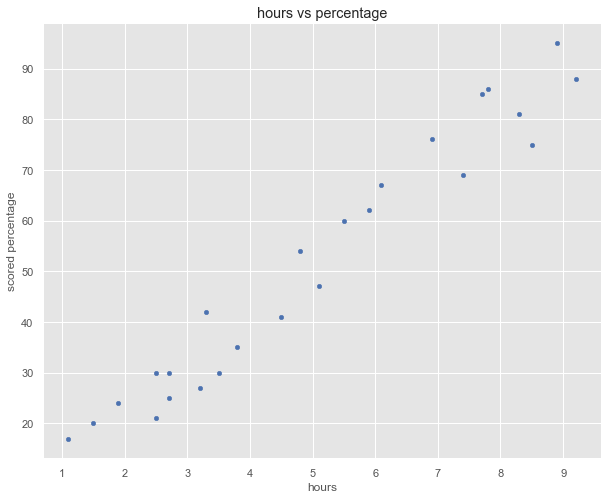

In [13]:
data.plot(kind='scatter',x='Hours',y='Scores',color='b',figsize=(10,8))
plt.title('hours vs percentage')
plt.xlabel('hours')
plt.ylabel('scored percentage')
plt.show()

# Model the data

In [14]:
x=np.asanyarray(data[['Hours']])
y=np.asanyarray(data[['Scores']])
#using train test split to split the data in train and test data
train_x, test_x, train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=2)


regressor = LinearRegression()
regressor.fit(train_x,train_y)

print("training complete")
coef = regressor.coef_
intercept = regressor.intercept_
print("Coeffients= ",coef )
print("Intercept= ",intercept)


training complete
Coeffients=  [[9.94061514]]
Intercept=  [1.50791048]


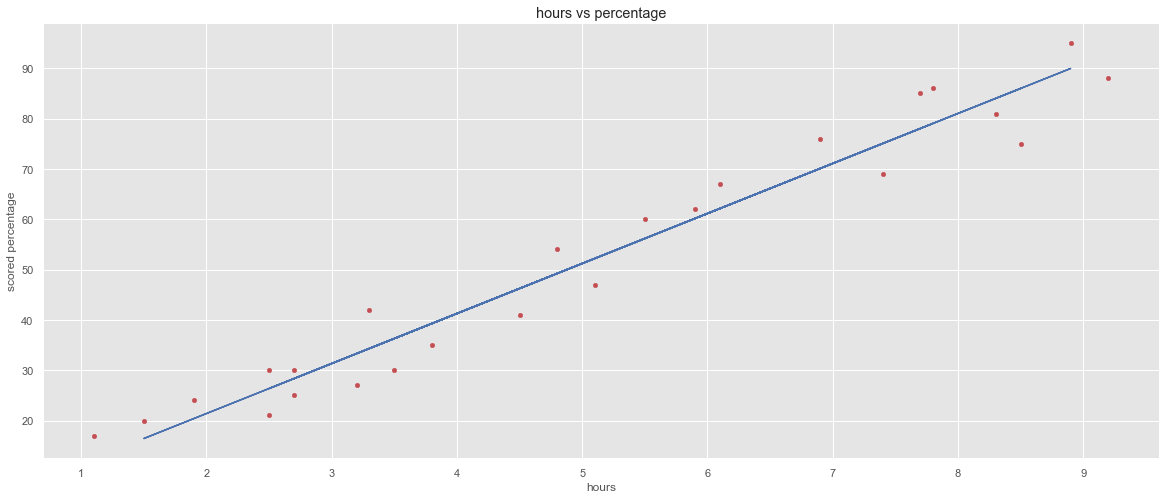

In [15]:
data.plot(kind="scatter",color='r',figsize=(20,8),x='Hours',y='Scores')
plt.title('hours vs percentage')
plt.xlabel('hours')
plt.ylabel('scored percentage')
plt.plot(train_x,regressor.coef_[0]*train_x+regressor.intercept_,color="b")
plt.show()

# Evaluating the model

In [16]:
from sklearn import metrics
from sklearn.metrics import r2_score

y_prediction = regressor.predict(test_x)
print("Mean Absolute Error : {}".format(metrics.mean_absolute_error(y_prediction,test_y)))
print("R-score = %.2f" % r2_score(y_prediction, test_y))


Mean Absolute Error : 4.877039354964484
R-score = 0.98


mean absolute error: is a measure of errors between paired observations expressing the same phenomenon.

# Predicting the score with the asked number of hours, i.e 9.25

In [17]:
hours=9.25
predicted_score=regressor.predict([[hours]])

print(f'No of hours={hours}')
print(f'predicted score={predicted_score[0]}')

No of hours=9.25
predicted score=[93.45860056]
